Data Cleaning

In [51]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [41]:
# Importing the dataset
df = pd.read_csv('Salary data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
 6   Department           373 non-null    object 
 7   Seniority            373 non-null    float64
dtypes: float64(4), object(4)
memory usage: 23.6+ KB


In [42]:
# Clean the data
df = df.dropna()
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Department,Seniority
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,IT and Technical services,0.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,IT and Technical services,0.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,HR and Administration,0.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,Sales,0.0
4,52.0,Male,Master's,Director,20.0,200000.0,HR and Administration,0.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
 6   Department           373 non-null    object 
 7   Seniority            373 non-null    float64
dtypes: float64(4), object(4)
memory usage: 26.2+ KB


Data Analysis

In [ ]:
### ADD BASU's CODE

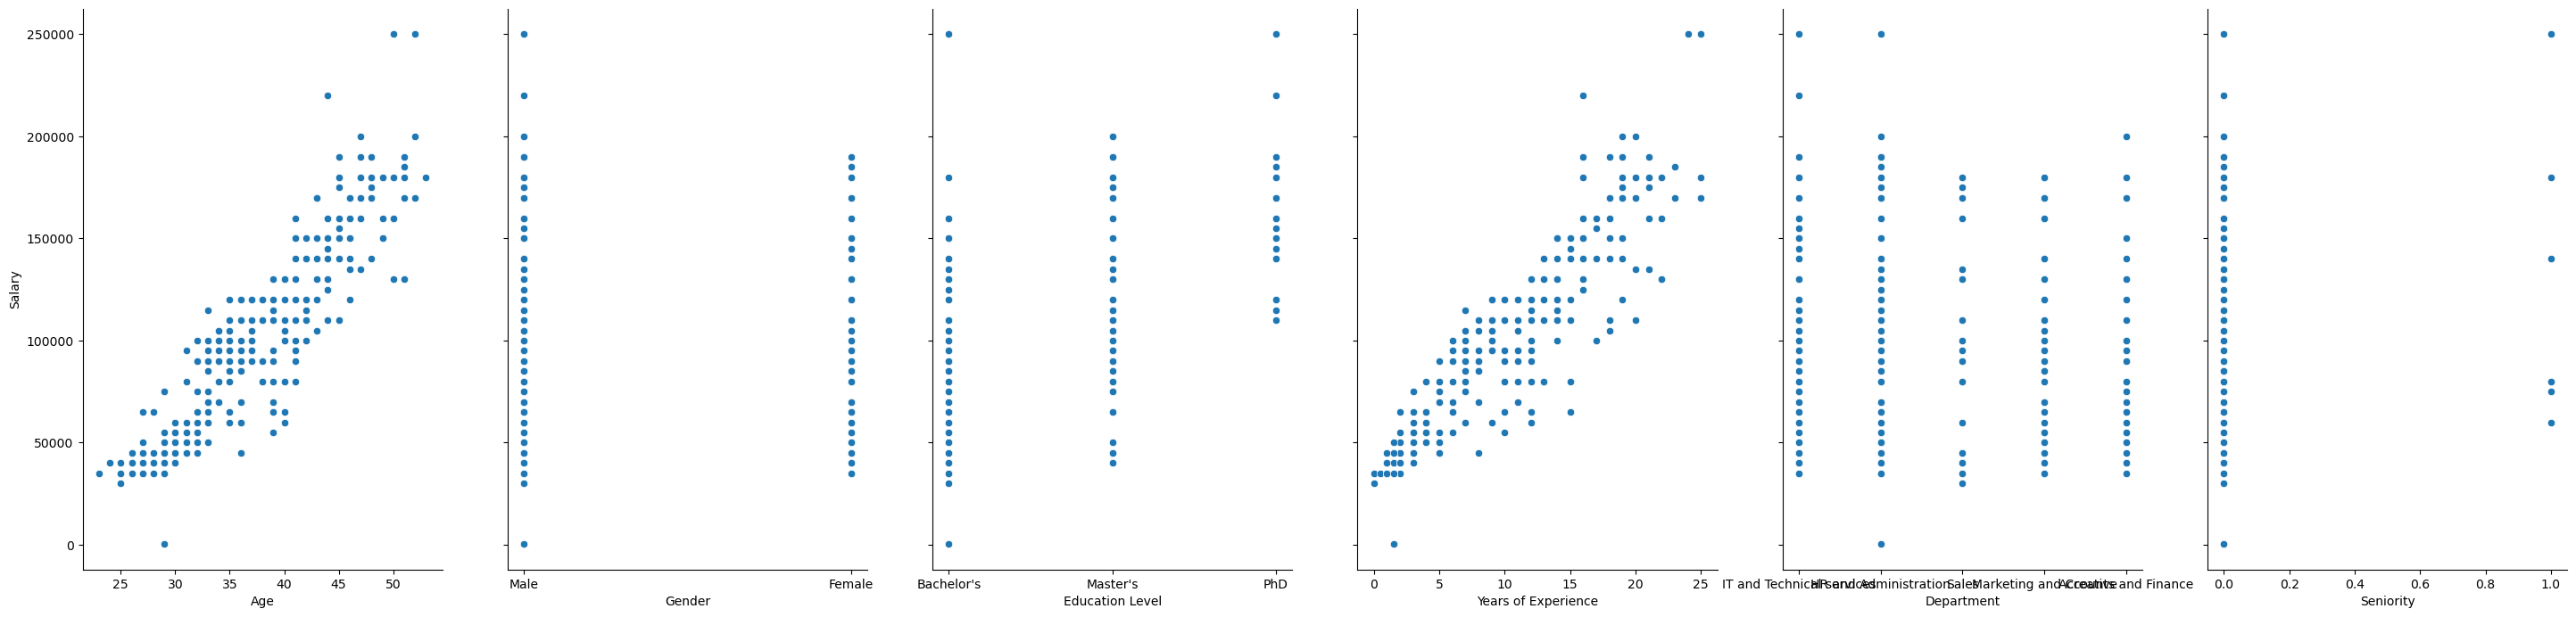

In [44]:
sns.pairplot(df,x_vars=['Age','Gender', 'Education Level','Years of Experience','Department','Seniority'],y_vars='Salary',height=7,aspect=0.7)

In [45]:
#one hot encoding for ategorical variables that are nominal (gender, Department)
df= pd.get_dummies(df, columns=['Gender','Department'], drop_first=True)

# Label encoding for ordinal variables
label_encoder = LabelEncoder()
df['education_level_encoded'] = label_encoder.fit_transform(df['Education Level'])

In [46]:
df.head(10)

,Age,Education Level,Job Title,Years of Experience,Salary,Seniority,Gender_Male,Department_HR and Administration,Department_IT and Technical services,Department_Marketing and Creative,Department_Sales,education_level_encoded
0,32.0,Bachelor's,Software Engineer,5.0,90000.0,0.0,1,0,1,0,0,0
1,28.0,Master's,Data Analyst,3.0,65000.0,0.0,0,0,1,0,0,1
2,45.0,PhD,Senior Manager,15.0,150000.0,0.0,1,1,0,0,0,2
3,36.0,Bachelor's,Sales Associate,7.0,60000.0,0.0,0,0,0,0,1,0
4,52.0,Master's,Director,20.0,200000.0,0.0,1,1,0,0,0,1
5,29.0,Bachelor's,Marketing Analyst,2.0,55000.0,0.0,1,0,0,1,0,0
6,42.0,Master's,Product Manager,12.0,120000.0,0.0,0,0,1,0,0,1
7,31.0,Bachelor's,Sales Manager,4.0,80000.0,0.0,1,0,0,0,1,0
8,26.0,Bachelor's,Marketing Coordinator,1.0,45000.0,0.0,0,0,0,1,0,0
9,38.0,PhD,Senior Scientist,10.0,110000.0,0.0,1,0,1,0,0,2


<AxesSubplot:>

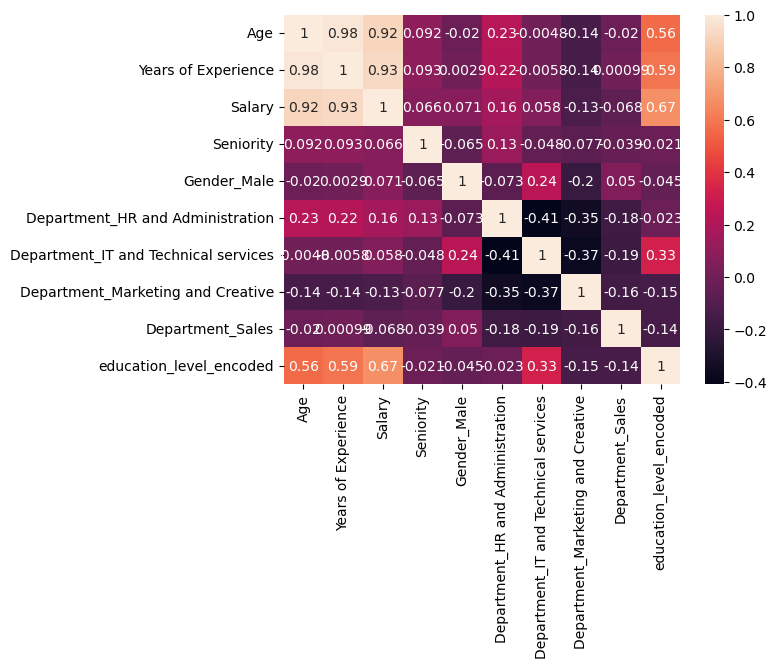

In [47]:
sns.heatmap(df.corr(),annot=True)

Machine Learning Model


In [50]:
# Prepare the Data

# Splitting the dataset into features and outcome variable (Salary)
y = df[['Salary']].values
# Features
x = df[['Age','Years of Experience','Seniority','Gender_Male','Department_HR and Administration','Department_IT and Technical services',\
        'Department_Marketing and Creative','Department_Sales','education_level_encoded']].values

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Multi Linear Regression Model

In [53]:
## Training the multiple linear regression on the training set
regressor_MultiLinear = LinearRegression()
regressor_MultiLinear.fit(x_train,y_train)

## Predicting test results
y_pred_linear = regressor_MultiLinear.predict(x_test)

# Accuracy

# Calculating r2 score
r2_MultiLinear = r2_score(y_test,y_pred_linear)
print(f"The R2 score for the Multi Linear Regression model is {r2_MultiLinear:.4f}")

# Calculate the Mean Squared Error (MSE)
mse_multilinear = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error:", mse_multilinear)

The R2 score for the Multi Linear Regression model is 0.8948
Mean Squared Error: 252236123.840377


Random Forest Model

In [55]:
# Create a Random Forest Regressor instance
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the regressor on the training data
rf_regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred_randf = rf_regressor.predict(x_test)

# Calculating r2 score
r2_randf = r2_score(y_test,y_pred_randf)
print(f"The R2 score for the Multi Linear Regression model is {r2_randf:.4f}")

# Calculate the Mean Squared Error (MSE)
mse_randf = mean_squared_error(y_test, y_pred_randf)
print("Mean Squared Error:", mse_randf)

The R2 score for the Multi Linear Regression model is 0.8667
Mean Squared Error: 319634693.43417734


C:\Users\sandh\AppData\Local\Temp\ipykernel_14092\4110599785.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(x_train, y_train)


Pick which model we will use

In [ ]:
def get_user_input():

    def get_integer_input(prompt):
        while True:
            try:
                value = int(input(prompt))
                return value
            except ValueError:
                print("Please enter a valid integer.")

    def get_valid_sex_input():
        while True:
            sex = input("What is your sex? (Male or Female): ").strip().capitalize()
            if sex in ["Male", "Female"]:
                return 1 if sex == "Male" else 0
            else:
                print("Please enter 'Male' or 'Female'.")

    def get_valid_education_input():
        while True:
            education = input("What is your level of education? (Bachelor, Master, PhD): ").strip().capitalize()
            if education in ["Bachelor", "Master", "Phd"]:
                return {"Bachelor": 0, "Master": 1, "Phd": 2}[education]
            else:
                print("Please enter 'Bachelor', 'Master', or 'PhD'.")
    

    age = get_integer_input("What is your age? ")
    sex = get_valid_sex_input()
    education = get_valid_education_input()
    experience = get_integer_input("How many years of experience do you have? ")

    return [age, sex, education, experience]


In [ ]:
if __name__ == "__main__":
    user_info = get_user_input()
    y_pred = regressor_MultiLinear.predict([user_info])
    age, sex, education, experience = user_info
    print("For a worker with the below demographic factors;")
    print("Age:", age)
    print("Sex (Male: 1, Female: 0):", sex)
    print("Education level (Bachelor: 0, Master: 1, PhD: 2):", education)
    #experience
    print(f"The expected salary is ${y_pred[0][0]:.2f}")

For a worker with the below demographic factors;
Age: 40
Sex (Male: 1, Female: 0): 1
Education level (Bachelor: 0, Master: 1, PhD: 2): 0
The expected salary is $129180.28
